In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
#check for the unique value
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [7]:
#Convert range into numerical data
def convertRange(x):
    try:
        temp = str(x).split('-')
        if len(temp) == 2:
            return (float(temp[0]) + float(temp[1]))/2
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convertRange)

In [8]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [9]:
#Fill the NaN value with mean of the same column
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].mean())

In [10]:
#Checking for the Null value after filling with the mean value of the same column 
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
# Convert String column in numerical column 
df['bhk'] = df['size'].str.extract(r'(\d+)').astype(float)

In [12]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'bhk'],
      dtype='object')

In [13]:
#Filling the Null value with mean of the same column 
df['bhk'] = df['bhk'].fillna(df['bhk'].mean())
df['balcony'] = df['balcony'].fillna(df['balcony'].mean())

In [14]:
df['bhk'].isna().sum()
df['balcony'].isna().sum()

0

In [15]:
# Removing the columns that are not in use to train the model
df.drop(columns=['area_type', 'availability', 'location', 'size', 'society', 'bath'], inplace = True)

In [16]:
df.columns

Index(['total_sqft', 'balcony', 'price', 'bhk'], dtype='object')

In [17]:
X = df[['balcony', 'bhk', 'total_sqft']]
y = df['price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
from sklearn.model_selection import GridSearchCV 

In [20]:
#Selecting the model to train the dataset
ridge_regression = Ridge()

In [21]:
ridge_regression

Ridge()

In [22]:
parameters = {'alpha':[1,2,4,10,24,50,70]}
ridgecv = GridSearchCV(ridge_regression, parameters, scoring='neg_mean_squared_error', cv = 5)
ridgecv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 4, 10, 24, 50, 70]},
             scoring='neg_mean_squared_error')

In [23]:
print(ridgecv.best_params_)

{'alpha': 1}


In [24]:
print(ridgecv.best_score_)

-15025.662730424487


In [27]:
ridge_pred = ridgecv.predict(X_test)

In [28]:
import seaborn as sns

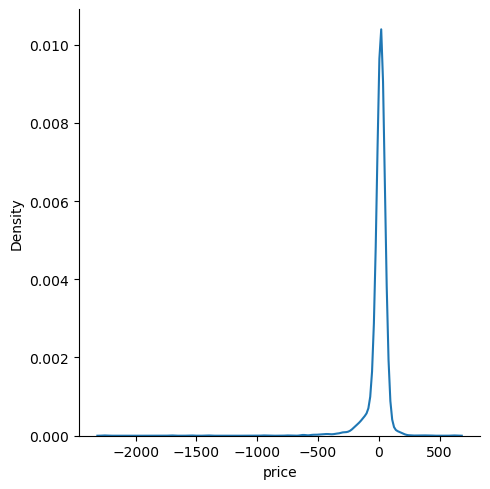

In [31]:
sns.displot(ridge_pred - y_test, kind='kde')

In [32]:
score = r2_score(ridge_pred, y_test)

In [33]:
score

-0.6746663553382903

In [35]:
## Lasso Regression 
from sklearn.linear_model import Lasso

In [36]:
lasso = Lasso()

In [39]:
parameters = {'alpha':[1,2,4,10,24,50,70]}
lassocv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)
lassocv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 4, 10, 24, 50, 70]},
             scoring='neg_mean_squared_error')

In [40]:
print(lassocv.best_params_)

{'alpha': 1}


In [42]:
lasso_pred = lassocv.predict(X_test)

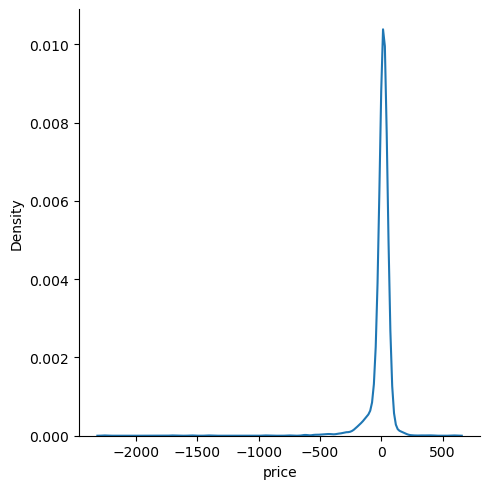

In [43]:
sns.displot(lasso_pred - y_test, kind='kde')

In [45]:
r2score = r2_score(lasso_pred, y_test)

In [46]:
r2score

-0.695689023575804